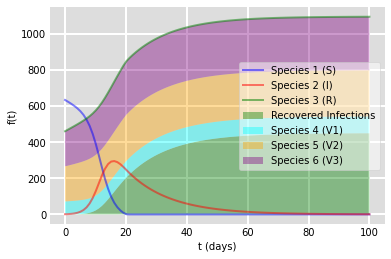

In [82]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial number of infected and recovered individuals, I0 and R0.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
n = 2 ** 10
init_vac = [0.07, 0.12, 0.19]
vacc_rates = [0.001, 0.003, 0.005]
# Everyone else, S0, is susceptible to infection initially.
y03 = 0
y02 = 1
y01 = n - sum(init_vac) * n - y02

y04 = init_vac[0] * n
y05 = init_vac[1] * n
y06 = init_vac[2] * n
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

def F(i, N):
    d = 0
    beta, gamma = 0.001, 1./14 
    X = N[i]
    for j in range(0, 6):
        Y = N[j]
        c1 = 0
        if j > 2:
            c1 = min(vacc_rates[j - 3] * n, N[0])
        c2 = 0
        if (i > 2):
            c2 = min(vacc_rates[i - 3] * n, Y)
            
        if N[2] > n:
            print('----')
            print(N[2])
            print(X)
            print('----')
        F = [
            [0, -beta * X * Y, 0, -c1, -c1, -c1],
            [beta * Y * X, -gamma * X, 0, 0, 0, 0],
            [0, gamma * Y, 0, 0, 0, 0],
            [c2, 0, 0, 0, 0, 0],
            [c2, 0, 0, 0, 0, 0],
            [c2, 0, 0, 0, 0, 0],
        ]
        d += F[i][j]
    return d
# The SIR model differential equations.
def deriv(y, t):
    N = y
    d1dt = F(0, N)
    d2dt = F(1, N)
    d3dt = F(2, N)
    d4dt = F(3, N)
    d5dt = F(4, N)
    d6dt = F(5, N)
    # print(t, d3dt)
    return d1dt, d2dt, d3dt, d4dt, d5dt, d6dt

# Initial conditions vector
y0 = y01, y02, y03, y04, y06, y06
# Integrate the SIR equations over the time grid, t.

ret = odeint(deriv, y0, t)
S, I, R, V1, V2, V3 = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Species 1 (S)')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Species 2 (I)')
ax.plot(t, V1 + V2 + V3 + R, 'g', alpha=0.5, lw=2, label='Species 3 (R)')
# ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Species 3 (R)')

vacc_values = [R, V1, V2, V3]
vacc_labels = ['Recovered Infections', 'Species 4 (V1)', 'Species 5 (V2)', 'Species 6 (V3)']
ax.stackplot(t, vacc_values, labels=vacc_labels, colors=['green', 'cyan', 'orange', 'purple'], alpha=0.4)
ax.set_xlabel('t (days)')
ax.set_ylabel('f(t)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()